In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
import pandas as pd

# Read the train.csv file
train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
sample_data = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')
# Display the first few rows of the dataset
print(train_data.head())
print(test_data.head())
print(sample_data.head())

   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode
       id  num_sold
0  230130       100
1  230131       100
2  230132       100
3  230133       100
4  230134       100


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
# Check for missing values in the train dataset
print(train_data.isnull().sum())

# Check for missing values in the test dataset
print(test_data.isnull().sum())


id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64
id         0
date       0
country    0
store      0
product    0
dtype: int64


In [15]:
# Get data types and non-null counts
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None


In [16]:
# Summary statistics for the train dataset
print(train_data.describe())


                  id       num_sold
count  230130.000000  221259.000000
mean   115064.500000     752.527382
std     66432.953062     690.165445
min         0.000000       5.000000
25%     57532.250000     219.000000
50%    115064.500000     605.000000
75%    172596.750000    1114.000000
max    230129.000000    5939.000000


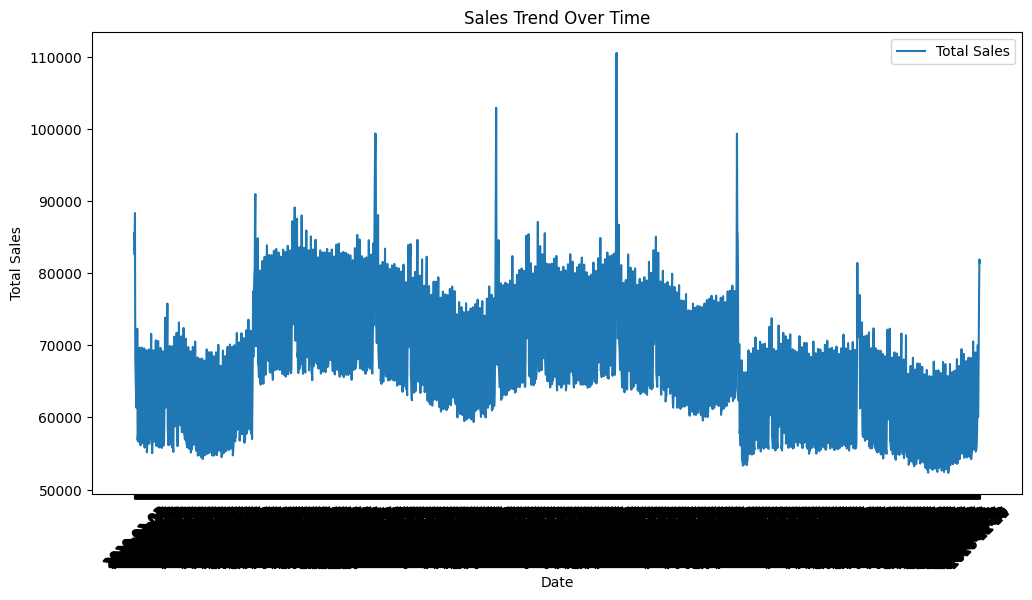

In [17]:
import matplotlib.pyplot as plt

# Group by date and sum the sales for each day
sales_over_time = train_data.groupby('date')['num_sold'].sum()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label='Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


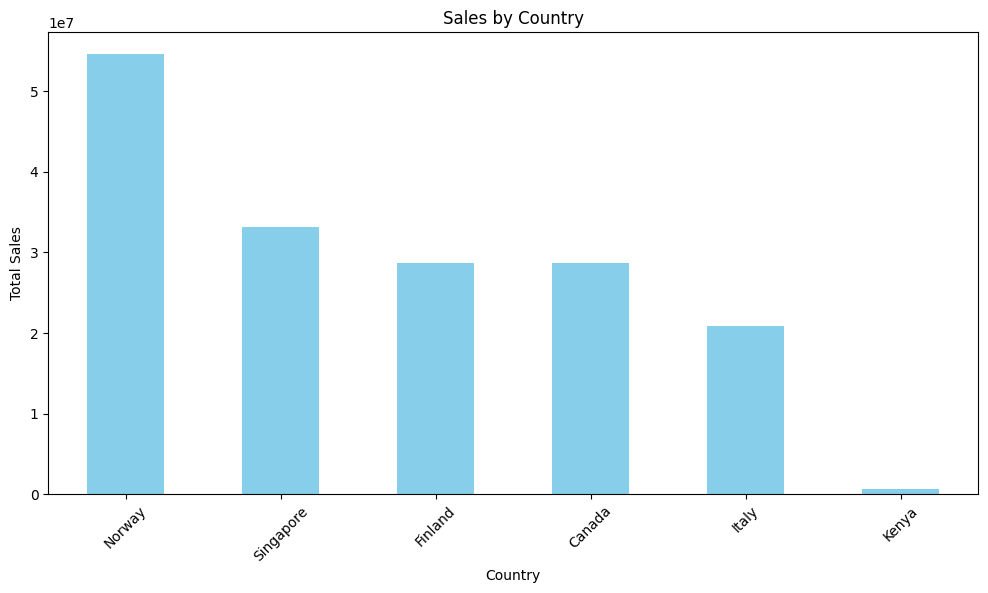

In [18]:
# Group by country and sum the sales
sales_by_country = train_data.groupby('country')['num_sold'].sum().sort_values(ascending=False)

# Plot the sales by country
plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.xticks(rotation=45)
plt.show()


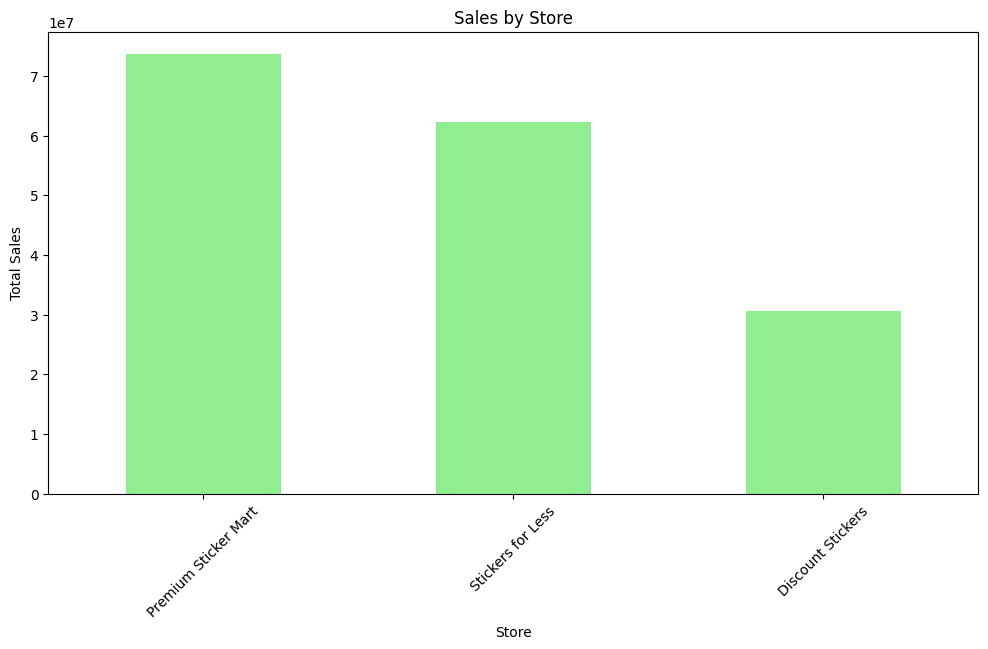

In [19]:
# Group by store and sum the sales
sales_by_store = train_data.groupby('store')['num_sold'].sum().sort_values(ascending=False)

# Plot the sales by store
plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar', color='lightgreen')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Sales by Store')
plt.xticks(rotation=45)
plt.show()


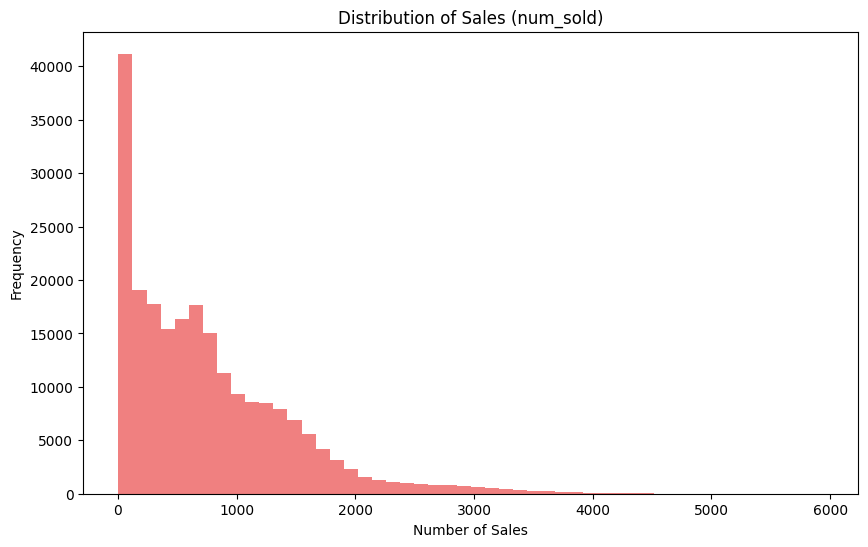

In [20]:
# Plot the distribution of num_sold
plt.figure(figsize=(10, 6))
train_data['num_sold'].dropna().plot(kind='hist', bins=50, color='lightcoral')
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales (num_sold)')
plt.show()


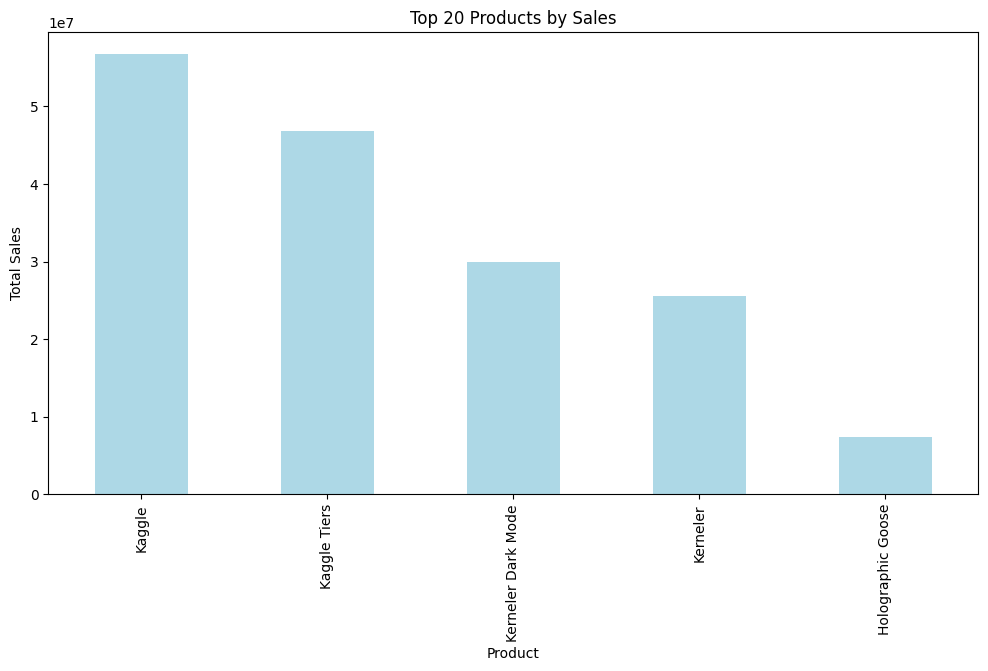

In [21]:
# Group by product and sum the sales
sales_by_product = train_data.groupby('product')['num_sold'].sum().sort_values(ascending=False)

# Plot the sales by product
plt.figure(figsize=(12, 6))
sales_by_product.head(20).plot(kind='bar', color='lightblue')  # Top 20 products
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 20 Products by Sales')
plt.xticks(rotation=90)
plt.show()


In [22]:
# Check missing data pattern in num_sold
missing_data = train_data[train_data['num_sold'].isnull()]

# Display missing data for further analysis
print(missing_data.head())

# Optionally, plot missing data count
missing_data_count = train_data['num_sold'].isnull().sum()
print(f"Number of missing sales values: {missing_data_count}")


      id        date country              store            product  num_sold
0      0  2010-01-01  Canada  Discount Stickers  Holographic Goose       NaN
45    45  2010-01-01   Kenya  Discount Stickers  Holographic Goose       NaN
90    90  2010-01-02  Canada  Discount Stickers  Holographic Goose       NaN
135  135  2010-01-02   Kenya  Discount Stickers  Holographic Goose       NaN
180  180  2010-01-03  Canada  Discount Stickers  Holographic Goose       NaN
Number of missing sales values: 8871


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# MODEL with XGB 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')

# Check for missing values in 'num_sold' and fill them (if necessary)
df['num_sold'] = df['num_sold'].fillna(df['num_sold'].median())

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['country', 'store', 'product'])

# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['num_sold', 'id', 'date'])  # Drop target and non-relevant columns
y = df_encoded['num_sold']

# Handle any other missing values in X (if necessary)
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1]
}

# RandomizedSearchCV for hyperparameter tuning
search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=10, random_state=42, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_xgb_model = search.best_estimator_

# Evaluate the XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

# Print the Mean Absolute Error (MAE)
print(f'XGBoost Model MAE: {xgb_mae}')


XGBoost Model MAE: 104.01744636898582


In [ ]:
# Load the test dataset
test = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')

# Perform the same preprocessing on the test data as done for the training data

# One-hot encode categorical columns in test data (same as the training data)
test_encoded = pd.get_dummies(test, columns=['country', 'store', 'product'])

# Ensure the test data has the same columns as the training data
X_train_encoded = pd.get_dummies(df, columns=['country', 'store', 'product']).drop(columns=['num_sold', 'id', 'date'])
test_encoded = test_encoded[X_train_encoded.columns]  # Align the test data with the training data

# Handle any missing values in the test data (if necessary)
test_encoded.fillna(0, inplace=True)

# Predict with the trained model
predictions = best_xgb_model.predict(test_encoded)

# Extract 'id' from the test data
test_ids = test['id']

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test_ids,
    'num_sold': predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")


# Model with H2OAutoML

In [1]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Initialize H2O
h2o.init()

# Load your dataset (replace with actual path)
df = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')

# Check for missing values and fill in 'num_sold'
df['num_sold'] = df['num_sold'].fillna(df['num_sold'].median())

# Feature Engineering

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Add lag features (e.g., previous sales)
df['lag_1'] = df.groupby(['country', 'store', 'product'])['num_sold'].shift(1)

# Add rolling mean/median of num_sold
df['rolling_mean'] = df.groupby(['country', 'store', 'product'])['num_sold'].rolling(window=7, min_periods=1).mean().reset_index(level=[0, 1, 2], drop=True)
df['rolling_median'] = df.groupby(['country', 'store', 'product'])['num_sold'].rolling(window=7, min_periods=1).median().reset_index(level=[0, 1, 2], drop=True)

# Add weekend indicator
df['is_weekend'] = df['date'].dt.weekday >= 5

# One-hot encoding of categorical columns (H2O can handle categorical variables natively, but let's one-hot for now)
df_encoded = pd.get_dummies(df, columns=['country', 'store', 'product'])

# Handle missing values (if any)
df_encoded.fillna(0, inplace=True)

# Ensure that the target 'num_sold' is included in the H2OFrame
df_encoded['num_sold'] = df['num_sold']  # Add 'num_sold' back to the dataset

# Convert to H2O Frame again, now including 'num_sold'
df_h2o = h2o.H2OFrame(df_encoded)

# Split into training and testing sets (time-based splitting if possible)
train, test = df_h2o.split_frame(ratios=[0.8], seed=42)

# Define the target and features for H2O AutoML
target = 'num_sold'
features = [col for col in df_h2o.columns if col != target]  # All columns except the target

# Initialize H2O AutoML
aml = H2OAutoML(max_models=20, seed=42, nfolds=5, sort_metric='MAE')

# Train the model
aml.train(x=features, y=target, training_frame=train)

# Get the best model from AutoML
best_model = aml.leader

# Evaluate the model
performance = best_model.model_performance(test_data=test)
mae = performance.mae()
print(f'Mean Absolute Error (MAE): {mae}')

# Predictions
predictions = best_model.predict(test)
print(predictions.head())



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjm8grw2a
  JVM stdout: /tmp/tmpjm8grw2a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjm8grw2a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_g7ryse
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Mean Absolute Error (MAE): 37.397558240504814
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
 383.871
1179.48
1609.17
 847.364
 652.434
 610.102
 606.67
  22.6922
  55.5008
  22.6609
[10 rows x 1 column]



In [12]:
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')


# Extract the predictions and convert them to a pandas DataFrame
predictions_df = predictions.as_data_frame()

# Check if the number of predictions matches the number of rows in the test data
if len(predictions_df) != len(test_data):
    print(f"Warning: Number of predictions ({len(predictions_df)}) does not match number of test rows ({len(test_data)})")
    
    # Fill missing predictions (if any) with 0 (or another suitable default)
    missing_predictions_count = len(test_data) - len(predictions_df)
    if missing_predictions_count > 0:
        print(f"Filling {missing_predictions_count} missing predictions with 0.")
        # Create a DataFrame of missing predictions with default values
        missing_predictions = pd.DataFrame({'predict': [0] * missing_predictions_count})
        # Append to the original predictions dataframe
        predictions_df = pd.concat([predictions_df, missing_predictions], ignore_index=True)

# Extract the 'id' column from the test set
submission_df = test_data[['id']].copy()

# Add the predicted 'num_sold' values to the submission dataframe
submission_df['num_sold'] = predictions_df['predict']

# Save the submission file as a CSV
submission_df.to_csv('/kaggle/working/submission_h2o.csv', index=False)

print("Submission file created successfully.")



Filling 52560 missing predictions with 0.
Submission file created successfully.


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
